In [1]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing
import os #operating system dependent modules of python
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
import re
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from scipy.stats import linregress
from scipy.stats import chi2_contingency

In [3]:
# from google.colab import files
# files.upload()
dataset = pd.read_excel("dataset.xlsx", index_col=0)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
dataset.shape

(50, 20)

In [5]:
# Print number of rows in data
print("Rows:", len(dataset))

Rows: 50


In [6]:
dataset.columns.values

array(['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4',
       'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9',
       'feature 10', 'feature 11', 'feature 12', 'feature 13',
       'feature 14', 'feature 15', 'feature 16', 'feature 17',
       'feature 18', 'feature 19'], dtype=object)

In [7]:
dataset.head(10)

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19
index,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,0,13,0,6,1,1,0,1,1,2,7,8,1,1,0,1
1,1,0,6,1,0,11,3,6,5,0,0,1,1,7,7,8,1,2,0,1
2,0,0,6,1,0,3,11,6,1,0,0,1,1,7,7,8,1,2,0,1
3,0,1,6,1,0,3,3,6,1,0,0,1,0,0,0,8,1,2,0,1
4,0,1,1,2,0,13,0,6,1,1,0,1,0,25,24,8,1,1,1,1
5,1,0,0,2,2,18,0,6,5,0,0,1,0,7,7,8,1,1,4,1
6,1,0,6,1,1,17,0,7,6,0,4,1,1,12,32,8,2,2,5,1
7,1,0,7,1,0,17,11,2,4,0,0,1,1,7,32,8,1,2,0,1
8,1,1,4,2,3,13,0,6,7,1,0,1,0,21,10,8,1,0,4,1


In [8]:
dataset.isnull().sum()

feature 0     0
feature 1     0
feature 2     0
feature 3     0
feature 4     0
feature 5     0
feature 6     0
feature 7     0
feature 8     0
feature 9     0
feature 10    0
feature 11    0
feature 12    0
feature 13    0
feature 14    0
feature 15    0
feature 16    0
feature 17    0
feature 18    0
feature 19    0
dtype: int64

In [9]:
dataset.info(21)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   feature 0   50 non-null     int64
 1   feature 1   50 non-null     int64
 2   feature 2   50 non-null     int64
 3   feature 3   50 non-null     int64
 4   feature 4   50 non-null     int64
 5   feature 5   50 non-null     int64
 6   feature 6   50 non-null     int64
 7   feature 7   50 non-null     int64
 8   feature 8   50 non-null     int64
 9   feature 9   50 non-null     int64
 10  feature 10  50 non-null     int64
 11  feature 11  50 non-null     int64
 12  feature 12  50 non-null     int64
 13  feature 13  50 non-null     int64
 14  feature 14  50 non-null     int64
 15  feature 15  50 non-null     int64
 16  feature 16  50 non-null     int64
 17  feature 17  50 non-null     int64
 18  feature 18  50 non-null     int64
 19  feature 19  50 non-null     int64
dtypes: int64(20)
memory usage: 8.2 KB


In [10]:
dataset.describe()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.30000,0.380000,3.380000,1.560000,0.540000,13.100000,2.920000,5.460000,2.320000,0.320000,0.400000,1.0,0.820000,11.760000,12.400000,7.940000,1.040000,1.280000,0.980000,0.980000
std,0.46291,0.490314,2.448573,0.577115,1.014386,5.047731,4.164182,1.798072,2.226373,0.471212,1.385051,0.0,0.437526,9.325322,9.476071,0.424264,0.402036,0.607437,1.731933,0.141421
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,1.000000,1.000000,0.000000,13.000000,0.000000,6.000000,1.000000,0.000000,0.000000,1.0,1.000000,7.000000,7.000000,8.000000,1.000000,1.000000,0.000000,1.000000
50%,0.00000,0.000000,4.000000,2.000000,0.000000,13.000000,0.000000,6.000000,1.000000,0.000000,0.000000,1.0,1.000000,7.000000,7.000000,8.000000,1.000000,1.000000,0.000000,1.000000
75%,1.00000,1.000000,5.750000,2.000000,1.000000,17.000000,6.000000,6.000000,3.750000,1.000000,0.000000,1.0,1.000000,17.500000,18.750000,8.000000,1.000000,2.000000,1.000000,1.000000
max,1.00000,1.000000,7.000000,2.000000,3.000000,20.000000,11.000000,7.000000,9.000000,1.000000,6.000000,1.0,2.000000,33.000000,32.000000,8.000000,2.000000,2.000000,5.000000,1.000000


In [11]:
# Number of each type of column
dataset.dtypes.value_counts()

int64    20
dtype: int64

In [12]:
# Number of unique classes in each object column
for col in dataset:
    x = dataset[col].unique()
    print(f"{col} -> unique values: {len(x)} ",sorted(x))

feature 0 -> unique values: 2  [0, 1]
feature 1 -> unique values: 2  [0, 1]
feature 2 -> unique values: 8  [0, 1, 2, 3, 4, 5, 6, 7]
feature 3 -> unique values: 3  [0, 1, 2]
feature 4 -> unique values: 4  [0, 1, 2, 3]
feature 5 -> unique values: 11  [1, 3, 5, 11, 12, 13, 14, 16, 17, 18, 20]
feature 6 -> unique values: 8  [0, 1, 3, 6, 7, 9, 10, 11]
feature 7 -> unique values: 5  [0, 2, 3, 6, 7]
feature 8 -> unique values: 8  [1, 2, 3, 4, 5, 6, 7, 9]
feature 9 -> unique values: 2  [0, 1]
feature 10 -> unique values: 4  [0, 4, 5, 6]
feature 11 -> unique values: 1  [1]
feature 12 -> unique values: 3  [0, 1, 2]
feature 13 -> unique values: 20  [0, 2, 3, 4, 7, 8, 10, 12, 13, 14, 16, 18, 19, 20, 21, 23, 25, 27, 28, 33]
feature 14 -> unique values: 17  [0, 3, 4, 7, 9, 10, 12, 13, 15, 18, 19, 20, 22, 24, 26, 27, 32]
feature 15 -> unique values: 2  [5, 8]
feature 16 -> unique values: 3  [0, 1, 2]
feature 17 -> unique values: 3  [0, 1, 2]
feature 18 -> unique values: 5  [0, 1, 3, 4, 5]
feature 19 

feature 11 has only one only in this dataset so it's useless

features 0,1,2,3,4,9,12,16,17,19 have all values in their range, so values are probably are aliases for a their class names.

features 5,6,7,8,10,13,14,15,18 probabliy are bucketsized for numerical values.


In [13]:
# droping useless column
dataset.drop(['feature 11'], axis=1, inplace=True)

In [14]:
for col in ['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 9', 'feature 12', 'feature 16', 'feature 17', 'feature 19']:
    dataset[col] = dataset[col].astype('category')

In [15]:
numerical_column = dataset.select_dtypes(exclude="category").columns.tolist()
categorical_column = dataset.select_dtypes(include="category").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 10', 'feature 13', 'feature 14', 'feature 15', 'feature 18']
****************
Categorical Columns: ['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 9', 'feature 12', 'feature 16', 'feature 17', 'feature 19']


# correlation

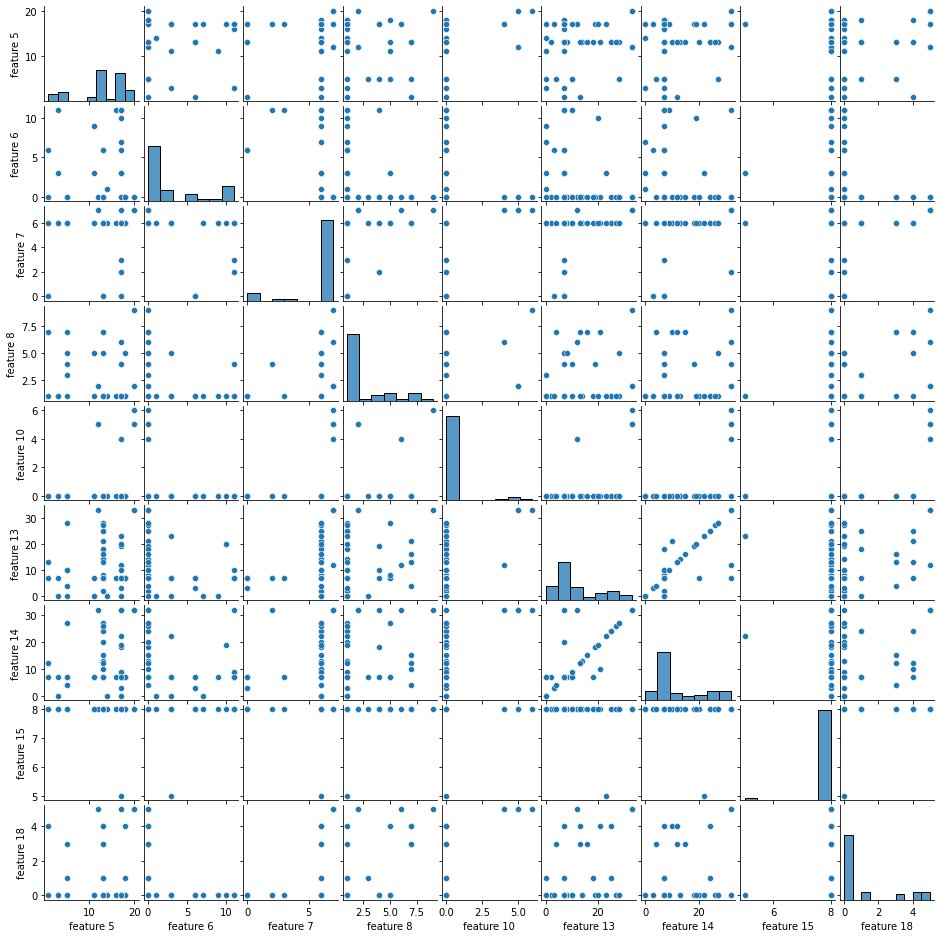

In [16]:
d = sns.pairplot(dataset, kind="scatter")
d.fig.set_size_inches(13,13)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


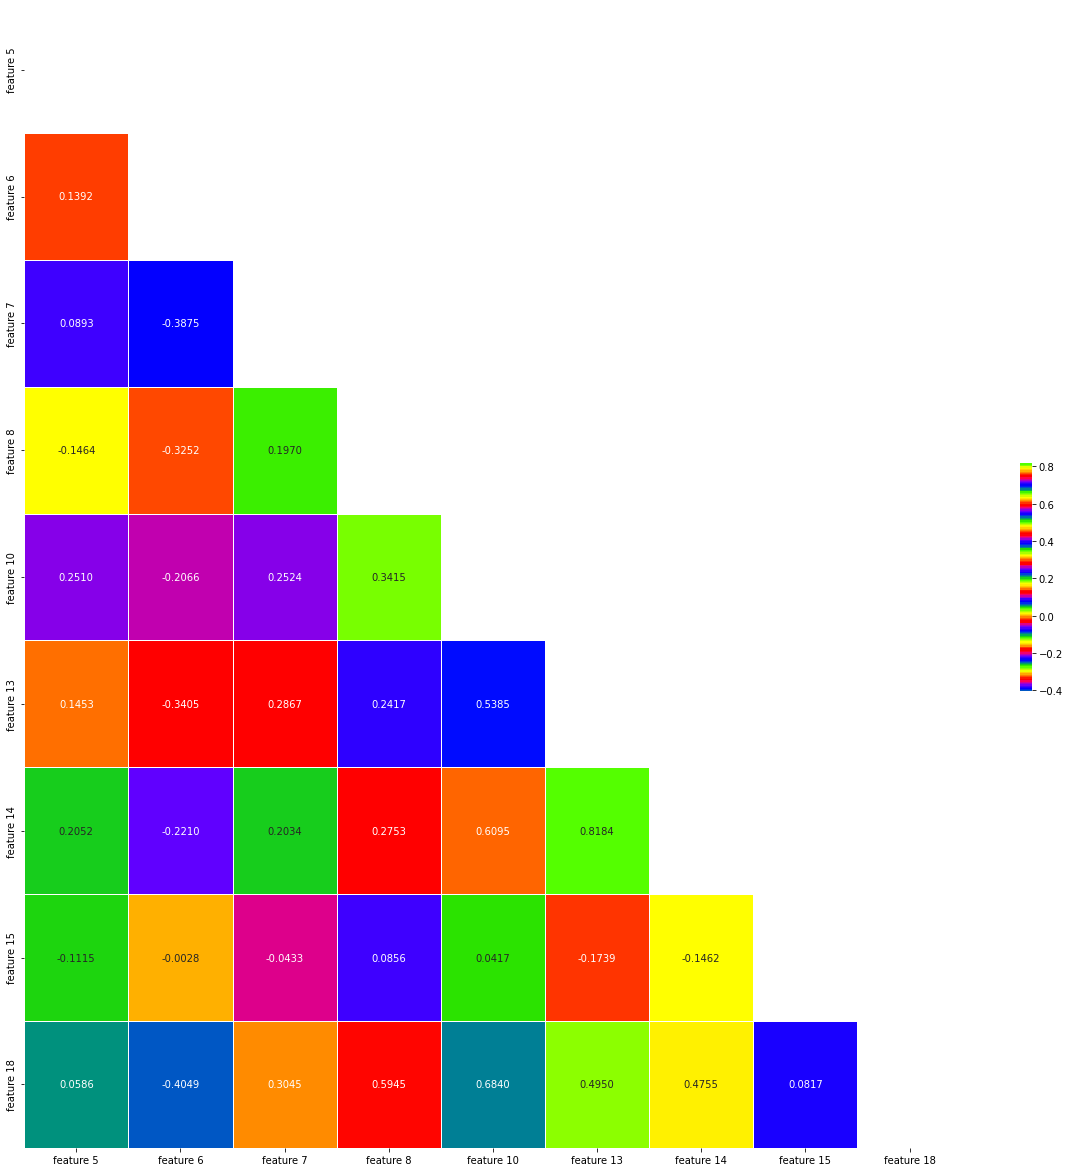

In [17]:
# check correlation
cols = dataset.columns
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(len(cols)+2, len(cols)+2))

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr,mask=mask,cmap='prism',center=0, linewidths=1,
                annot=True,fmt='.4f', cbar_kws={"shrink":.2})

In [18]:
mean_corr = corr.mean()
mean_corr = mean_corr.sort_values(ascending=True)
mean_corr = mean_corr[:6]
mean_corr

feature 6    -0.083255
feature 15    0.081239
feature 5     0.181202
feature 7     0.211371
feature 8     0.251548
feature 13    0.334568
dtype: float64

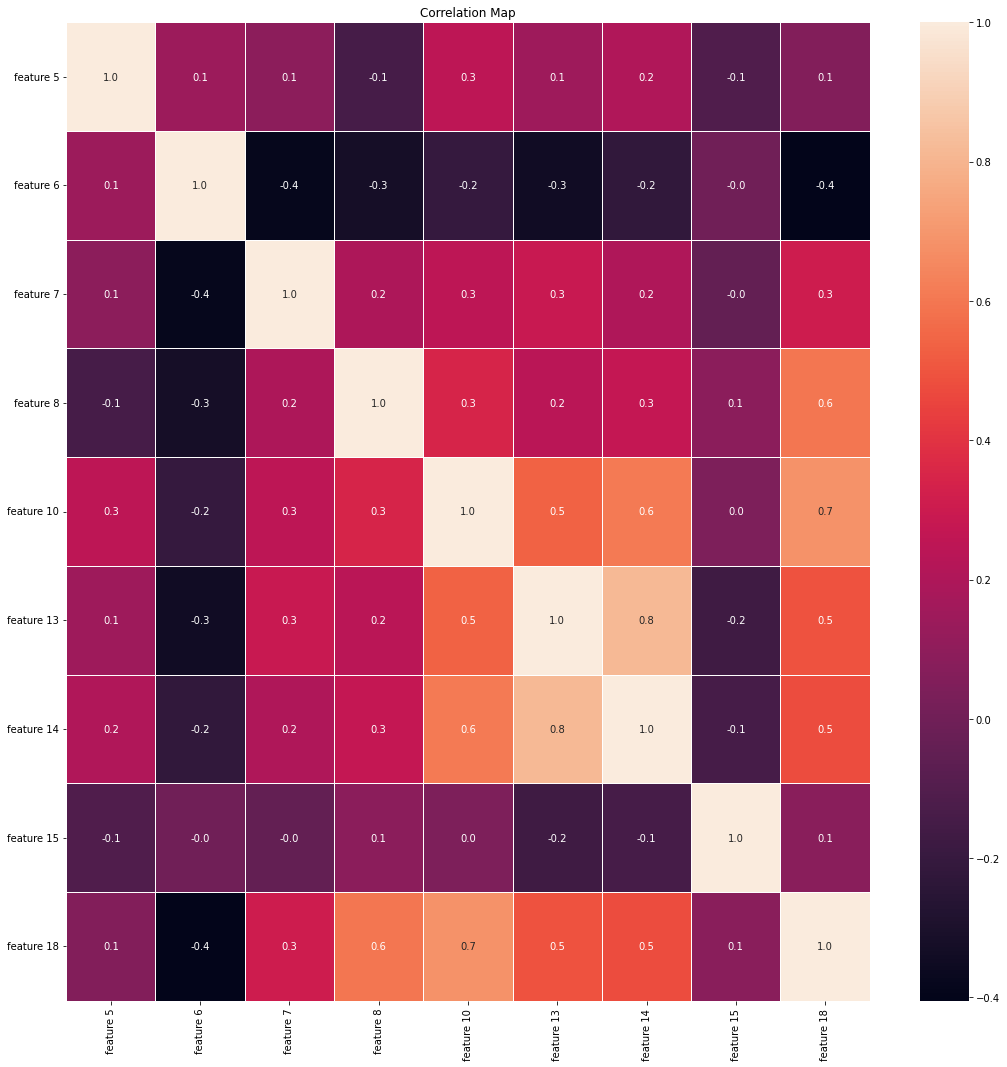

In [19]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(dataset.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [20]:
dataset.corr()

,feature 5,feature 6,feature 7,feature 8,feature 10,feature 13,feature 14,feature 15,feature 18
feature 5,1.000000,0.139228,0.089267,-0.146368,0.251038,0.145328,0.205222,-0.111495,0.058594
feature 6,0.139228,1.000000,-0.387476,-0.325174,-0.206643,-0.340533,-0.221045,-0.002772,-0.404876
feature 7,0.089267,-0.387476,1.000000,0.196986,0.252396,0.286656,0.203379,-0.043339,0.304470
feature 8,-0.146368,-0.325174,0.196986,1.000000,0.341499,0.241654,0.275304,0.085559,0.594473
feature 10,0.251038,-0.206643,0.252396,0.341499,1.000000,0.538485,0.609531,0.041676,0.684011
feature 13,0.145328,-0.340533,0.286656,0.241654,0.538485,1.000000,0.818429,-0.173937,0.495027
feature 14,0.205222,-0.221045,0.203379,0.275304,0.609531,0.818429,1.000000,-0.146195,0.475513
feature 15,-0.111495,-0.002772,-0.043339,0.085559,0.041676,-0.173937,-0.146195,1.000000,0.081655
feature 18,0.058594,-0.404876,0.304470,0.594473,0.684011,0.495027,0.475513,0.081655,1.000000


# correlation matrix


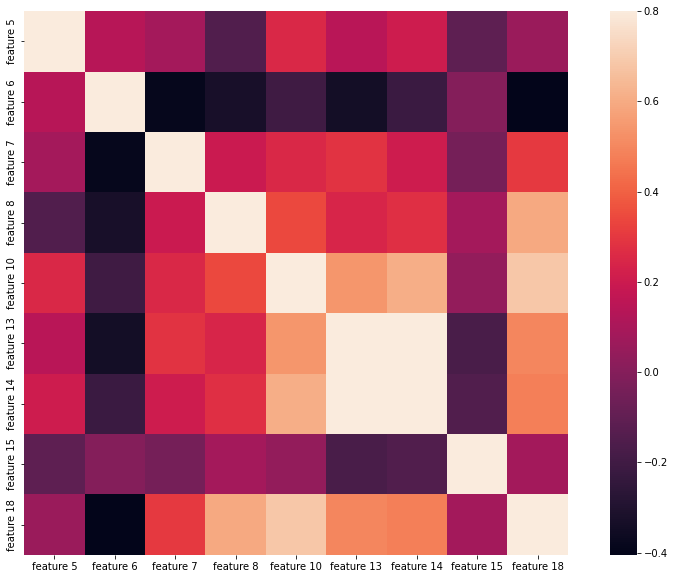

In [21]:
#correlation matrix 
corrmat = dataset.corr() 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(corrmat, vmax=.8, square=True); 
plt.show()

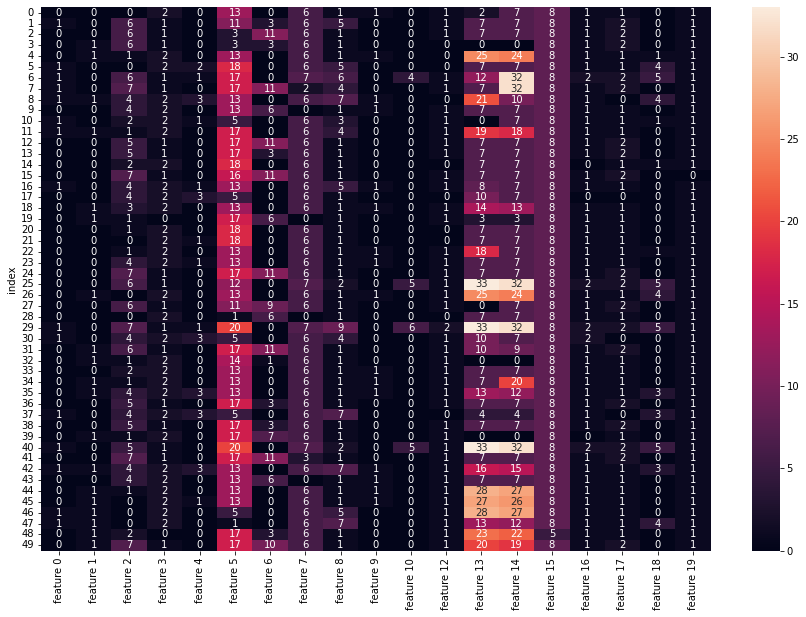

In [22]:
# visualize with seaborn library
fig, ax = plt.subplots(figsize=(15, 10))  
sns.heatmap(dataset,annot=True,fmt="d", ax=ax)
plt.show()

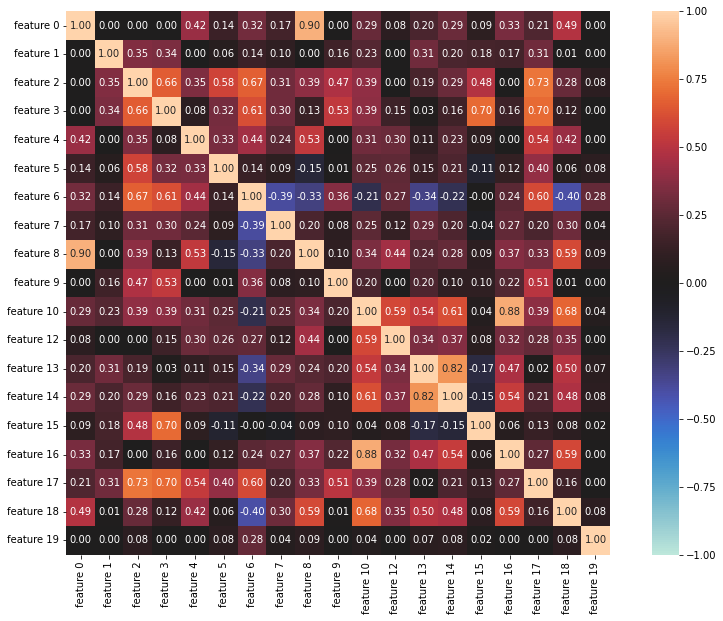

{'ax': <AxesSubplot:>,
 'corr':             feature 0  feature 1  feature 2  feature 3  feature 4  feature 5  \
 feature 0    1.000000   0.000000   0.000000   0.000000   0.419435   0.144110   
 feature 1    0.000000   1.000000   0.351985   0.339814   0.000000   0.056896   
 feature 2    0.000000   0.351985   1.000000   0.661803   0.347768   0.575569   
 feature 3    0.000000   0.339814   0.661803   1.000000   0.080058   0.321717   
 feature 4    0.419435   0.000000   0.347768   0.080058   1.000000   0.330960   
 feature 5    0.144110   0.056896   0.575569   0.321717   0.330960   1.000000   
 feature 6    0.315496   0.144733   0.667146   0.614850   0.441726   0.139228   
 feature 7    0.174084   0.098612   0.308646   0.304824   0.242974   0.089267   
 feature 8    0.895051   0.001496   0.387832   0.133092   0.526770  -0.146368   
 feature 9    0.000000   0.160662   0.472404   0.527821   0.000000   0.013728   
 feature 10   0.286473   0.228390   0.393720   0.388973   0.310516   0.251038 

In [23]:
# Categorical correlation too
associations(dataset, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=(15,10), annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

In [24]:
# values of dataset
X = dataset.values

# tests

In [25]:
linregress(dataset['feature 13'], dataset['feature 14'])

LinregressResult(slope=0.8316592820666865, intercept=2.619686842895767, rvalue=0.8184289500716829, pvalue=3.9059097133753345e-13, stderr=0.08427821098320588, intercept_stderr=1.2600085799455227)

because p-value is less than 0.05 there is a significant relation between these two features

In [26]:
for col1 in dataset:
  may_have_relation = []
  for col2 in dataset:
    if linregress(dataset[col1], dataset[col2]).pvalue < 0.05:
      may_have_relation.append(str(col2))
  may_have_relation.remove(col1)
  print(f"{col1} have relation with ->", may_have_relation)

feature 0 have relation with -> ['feature 4', 'feature 6', 'feature 8', 'feature 10', 'feature 14', 'feature 16', 'feature 18']
feature 1 have relation with -> ['feature 2', 'feature 13']
feature 2 have relation with -> ['feature 1', 'feature 3', 'feature 6', 'feature 9', 'feature 10', 'feature 12', 'feature 16', 'feature 17']
feature 3 have relation with -> ['feature 2', 'feature 4', 'feature 5', 'feature 6', 'feature 9', 'feature 10', 'feature 12', 'feature 15', 'feature 17']
feature 4 have relation with -> ['feature 0', 'feature 3', 'feature 6', 'feature 8', 'feature 12', 'feature 17', 'feature 18']
feature 5 have relation with -> ['feature 3', 'feature 17']
feature 6 have relation with -> ['feature 0', 'feature 2', 'feature 3', 'feature 4', 'feature 7', 'feature 8', 'feature 9', 'feature 13', 'feature 17', 'feature 18', 'feature 19']
feature 7 have relation with -> ['feature 6', 'feature 13', 'feature 18']
feature 8 have relation with -> ['feature 0', 'feature 4', 'feature 6', 'fea

In [27]:
# categorical test
for i in range(len(categorical_column)):
  for j in range(0,i):
    print()
    tmp = pd.crosstab(dataset[categorical_column[i]], dataset[categorical_column[j]])
    print(tmp)
    print()
    print(chi2_contingency(tmp))
    if (chi2_contingency(tmp)[1] < 0.05):
      print('there is a probable relation')
    print("\n-----------------")


feature 0   0   1
feature 1        
0          21  10
1          14   5

(0.016169455897808986, 0.898814416301909, 1, array([[21.7,  9.3],
       [13.3,  5.7]]))

-----------------

feature 0  0  1
feature 2      
0          5  3
1          8  1
2          3  1
3          1  0
4          5  5
5          4  1
6          5  2
7          4  2

(4.40098261526833, 0.7326054853609543, 7, array([[5.6, 2.4],
       [6.3, 2.7],
       [2.8, 1.2],
       [0.7, 0.3],
       [7. , 3. ],
       [3.5, 1.5],
       [4.9, 2.1],
       [4.2, 1.8]]))

-----------------

feature 1  0  1
feature 2      
0          4  4
1          2  7
2          3  1
3          0  1
4          7  3
5          5  0
6          5  2
7          5  1

(13.211119195839059, 0.06712855858431097, 7, array([[4.96, 3.04],
       [5.58, 3.42],
       [2.48, 1.52],
       [0.62, 0.38],
       [6.2 , 3.8 ],
       [3.1 , 1.9 ],
       [4.34, 2.66],
       [3.72, 2.28]]))

-----------------

feature 0   0   1
feature 3        
0       

In [28]:
# categorical test
for i in range(len(categorical_column)):
  for j in range(0,i):
    if (chi2_contingency(pd.crosstab(dataset[categorical_column[i]], dataset[categorical_column[j]]))[1] < 0.05):
      print(f'there is a probable relation betwenn {categorical_column[i]} and {categorical_column[j]}')

there is a probable relation betwenn feature 3 and feature 1
there is a probable relation betwenn feature 3 and feature 2
there is a probable relation betwenn feature 4 and feature 0
there is a probable relation betwenn feature 4 and feature 2
there is a probable relation betwenn feature 9 and feature 2
there is a probable relation betwenn feature 9 and feature 3
there is a probable relation betwenn feature 12 and feature 4
there is a probable relation betwenn feature 16 and feature 0
there is a probable relation betwenn feature 16 and feature 12
there is a probable relation betwenn feature 17 and feature 1
there is a probable relation betwenn feature 17 and feature 2
there is a probable relation betwenn feature 17 and feature 3
there is a probable relation betwenn feature 17 and feature 4
there is a probable relation betwenn feature 17 and feature 9
there is a probable relation betwenn feature 17 and feature 12
there is a probable relation betwenn feature 17 and feature 16


# k-means clustering

In [29]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


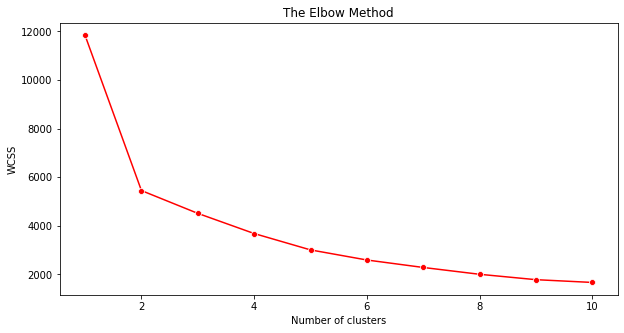

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Principal Component Analysis

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.03605528e+01,  1.03189171e+00, -1.56445626e+00,
         5.33916309e+00, -2.64908901e+00, -6.90969208e-01,
        -3.69705464e-01,  8.18545956e-01, -4.84694549e-01,
         1.22535045e-01, -5.00328852e-01, -4.97583023e-01,
        -5.11854201e-01,  1.16992787e-01, -1.89788612e-01,
        -2.85992643e-01,  1.42217437e-01,  8.71851269e-02,
        -1.28819003e-02],
       [-7.19289278e+00,  1.29232064e+00,  1.01213029e+00,
        -1.04111189e-01,  3.44127076e+00, -3.08414665e-01,
        -5.68005191e-01, -1.61842351e+00, -1.84318314e+00,
        -6.92233859e-01,  3.53598774e-01,  3.63223746e-01,
        -1.04435015e-01, -2.04003665e-01,  1.23606101e-01,
        -1.36146726e-01, -1.80514147e-02,  2.20341731e-01,
         8.66081909e-03],
       [-8.89332479e+00,  3.35815764e+00,  9.48754342e+00,
        -6.58061537e+00,  6.25921955e-01, -1.79677379e+00,
        -1.01918106e+00,  1.40238428e+00, -9.11662282e-02,
         2.18736539e-01, -1.99831123e-01, -1.24455924e-01,
    

[6.85274042e-01 1.19898270e-01 7.47945507e-02 5.57615588e-02
 2.89085944e-02 1.30697907e-02 7.84230964e-03 5.96681767e-03
 3.46109653e-03 1.42188645e-03 1.16277158e-03 7.72885874e-04
 5.26097249e-04 4.04853157e-04 2.35129512e-04 2.07353968e-04
 1.22025860e-04 9.91526859e-05 7.08131798e-05]


<function matplotlib.pyplot.show>

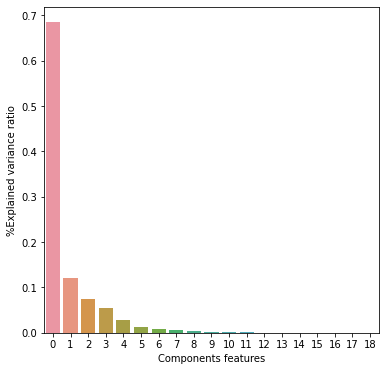

In [33]:
evr = pca.explained_variance_ratio_
print(evr)
features = [str(i) for i in range(len(evr)) ]
    
    
plt.figure(figsize=(6,6))
sns.barplot(x=np.array(features), y=evr)
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show


In [34]:
evr.shape

(19,)

In [35]:
x=np.array(features)
print(x.shape)
y=evr
print(y.shape)

(19,)
(19,)


****feature:feature 0****


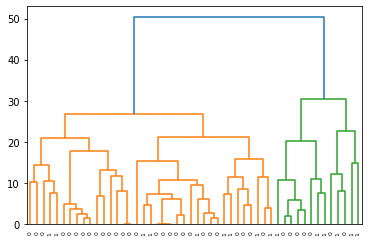

****feature:feature 1****


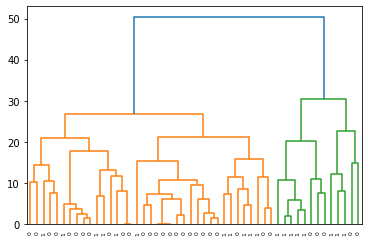

****feature:feature 2****


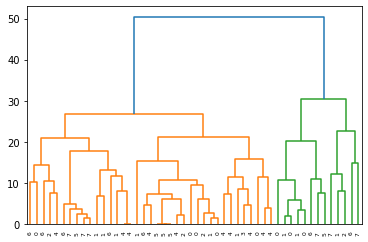

****feature:feature 3****


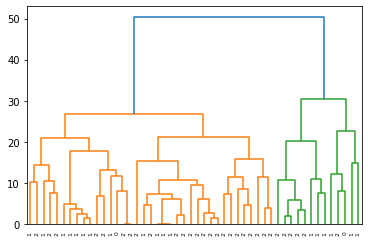

****feature:feature 4****


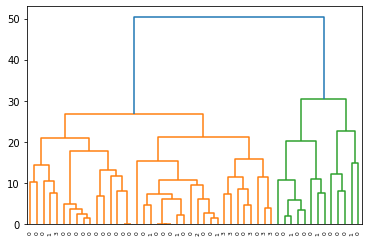

****feature:feature 5****


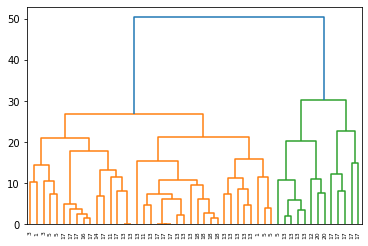

****feature:feature 6****


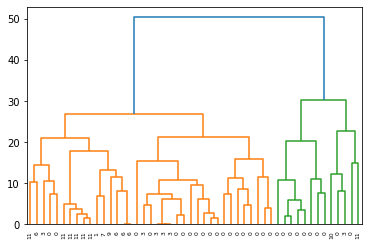

****feature:feature 7****


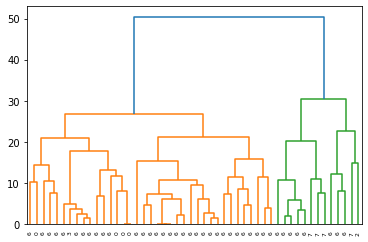

****feature:feature 8****


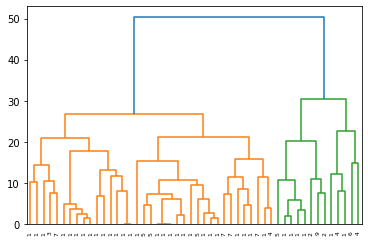

****feature:feature 9****


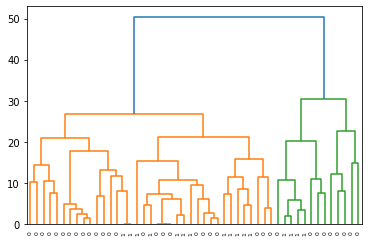

****feature:feature 10****


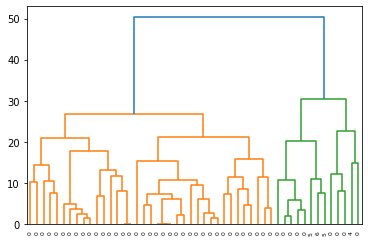

****feature:feature 12****


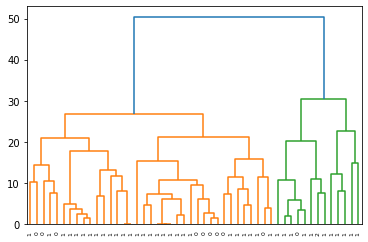

****feature:feature 13****


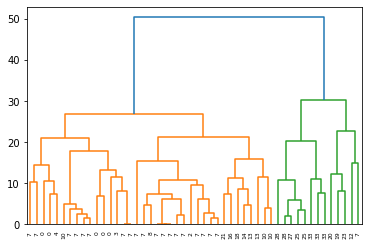

****feature:feature 14****


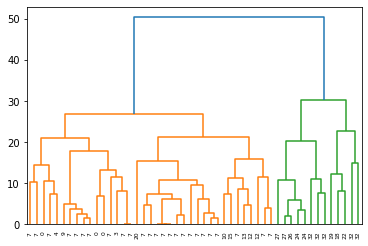

****feature:feature 15****


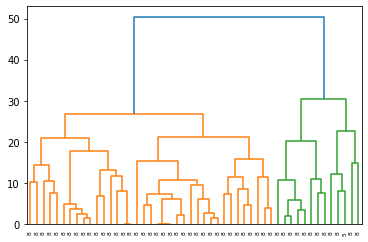

****feature:feature 16****


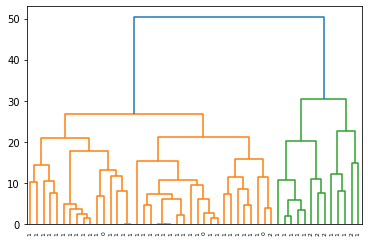

****feature:feature 17****


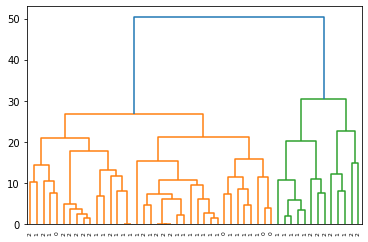

****feature:feature 18****


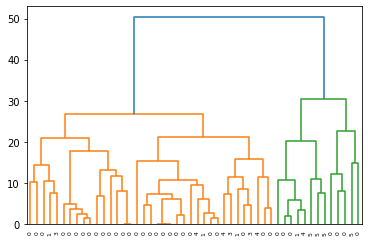

****feature:feature 19****


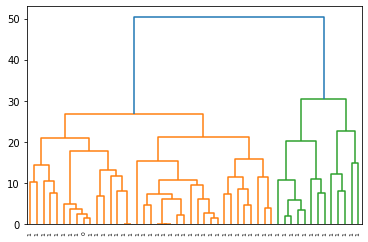

In [36]:
# Hierarchical clustering
for column_name in dataset:
  samples = dataset.values
  c_dataset = dataset.copy()
  print('****feature:{}****'.format(column_name))
  varieties = list(c_dataset.pop(column_name))
  mergings = linkage(samples, method='complete')
  dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )
  plt.show()

In [37]:
for column_name in dataset:
  print('****feature:{}****'.format(column_name))
  train = dataset.copy()
  xtrain, xtest, ytrain, ytest = train_test_split(train.drop(columns=column_name), train[column_name], test_size=0.2, random_state=0)
  standard_scaler = StandardScaler()
  xtrain[xtrain.columns] = standard_scaler.fit_transform(xtrain[xtrain.columns])
  xtest[xtest.columns] = standard_scaler.transform(xtest[xtest.columns])
  lr = LogisticRegression()
  try:
    lr.fit(xtrain, ytrain)
  except ValueError:
    print('**** Value Error: Classification with only 1 class')
    continue
  ypredict = lr.predict(xtest)
  print(classification_report(ytest, ypredict))

****feature:feature 0****
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.50      0.67         2

    accuracy                           0.90        10
   macro avg       0.94      0.75      0.80        10
weighted avg       0.91      0.90      0.89        10

****feature:feature 1****
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.25      0.33      0.29         3

    accuracy                           0.50        10
   macro avg       0.46      0.45      0.45        10
weighted avg       0.54      0.50      0.52        10

****feature:feature 2****
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
          11       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2
          17       0.60      0.75      0.67         4
          18       0.00      0.00      0.00         0

    accuracy                           0.60        10
   macro avg       0.30      0.39      0.33        10
weighted avg       0.49      0.60      0.53        10

****feature:feature 6****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           3       0.25      1.00      0.40         1
           6       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          11       1.00      0.33      0.50         3

    accuracy                           0.70        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

****feature:feature 12****
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      1.00      0.89         8

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10

****feature:feature 13****
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           7       0.50      1.00      0.67         4
          10       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

****feature:feature 17****
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

****feature:feature 18****
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0

    accuracy                           0.70        10
   macro avg       0.26      0.33      0.29        10
weighted avg       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1